In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data2023 = pd.read_excel('TA april/2023.xlsx')
data2023 = data2023.T
column2023 = data2023.iloc[1]
new_data2023 = data2023.iloc[2:]
new_data2023.columns = column2023

daging_2023 = new_data2023['Daging Ayam']
daging_2023.head()

02/ 01/ 2023    31,750
03/ 01/ 2023    31,600
04/ 01/ 2023    31,450
05/ 01/ 2023    31,200
06/ 01/ 2023    31,100
Name: Daging Ayam, dtype: object

In [3]:
data2022_1 = pd.read_excel('TA april/2022-1.xlsx')
data2022_1 = data2022_1.T
column2022_1 = data2022_1.iloc[1]
new_data2022_1 = data2022_1.iloc[2:]
new_data2022_1.columns = column2022_1
new_data2022_1

daging_2022_1 = new_data2022_1['Daging Ayam']
daging_2022_1.head()

03/ 01/ 2022    35,950
04/ 01/ 2022    35,950
05/ 01/ 2022    35,800
06/ 01/ 2022    35,550
07/ 01/ 2022    35,300
Name: Daging Ayam, dtype: object

In [4]:
data2022_2 = pd.read_excel('TA april/2022-2.xlsx')
data2022_2 = data2022_2.T
column2022_2 = data2022_2.iloc[1]
new_data2022_2 = data2022_2.iloc[2:]
new_data2022_2.columns = column2022_2
new_data2022_2

daging_2022_2 = new_data2022_2['Daging Ayam']
daging_2022_2.head()

01/ 07/ 2022    36,400
04/ 07/ 2022    36,800
05/ 07/ 2022    36,950
06/ 07/ 2022    37,900
07/ 07/ 2022    38,750
Name: Daging Ayam, dtype: object

In [5]:
data2021_1 = pd.read_excel('TA april/2021-1.xlsx')
data2021_1 = data2021_1.T
column2021_1 = data2021_1.iloc[1]
new_data2021_1 = data2021_1.iloc[2:]
new_data2021_1.columns = column2021_1
new_data2021_1

daging_2021_1 = new_data2021_1['Daging Ayam']
daging_2021_1.head()

01/ 01/ 2021         -
04/ 01/ 2021    32,850
05/ 01/ 2021    32,800
06/ 01/ 2021    32,700
07/ 01/ 2021    32,550
Name: Daging Ayam, dtype: object

In [6]:
data2021_2 = pd.read_excel('TA april/2021-2.xlsx')
data2021_2 = data2021_2.T
column2021_2 = data2021_2.iloc[1]
new_data2021_2 = data2021_2.iloc[2:]
new_data2021_2.columns = column2021_2
new_data2021_2

daging_2021_2 = new_data2021_2['Daging Ayam']
daging_2021_2.head()

01/ 07/ 2021    29,650
02/ 07/ 2021    29,150
05/ 07/ 2021    29,700
06/ 07/ 2021    29,850
07/ 07/ 2021    30,000
Name: Daging Ayam, dtype: object

In [7]:
data2020_1 = pd.read_excel('TA april/2020-1.xlsx')
data2020_1 = data2020_1.T
column2020_1 = data2020_1.iloc[1]
new_data2020_1 = data2020_1.iloc[2:]
new_data2020_1.columns = column2020_1
new_data2020_1

daging_2020_1 = new_data2020_1['Daging Ayam']
daging_2020_1.head()

01/ 01/ 2020         -
02/ 01/ 2020    31,450
03/ 01/ 2020    31,150
06/ 01/ 2020    29,750
07/ 01/ 2020    29,500
Name: Daging Ayam, dtype: object

In [8]:
data2020_2 = pd.read_excel('TA april/2020-2.xlsx')
data2020_2 = data2020_2.T
column2020_2 = data2020_2.iloc[1]
new_data2020_2 = data2020_2.iloc[2:]
new_data2020_2.columns = column2020_2
new_data2020_2

daging_2020_2 = new_data2020_2['Daging Ayam']
daging_2020_2.head()

01/ 07/ 2020    38,400
02/ 07/ 2020    40,350
03/ 07/ 2020    40,950
06/ 07/ 2020    38,100
07/ 07/ 2020    37,650
Name: Daging Ayam, dtype: object

In [9]:
joined_data = pd.concat([daging_2020_1,
                         daging_2020_2,
                         daging_2021_1,
                         daging_2021_2,
                         daging_2022_1,
                         daging_2022_2,
                         daging_2023
                         ], axis=0)

joined_data

01/ 01/ 2020         -
02/ 01/ 2020    31,450
03/ 01/ 2020    31,150
06/ 01/ 2020    29,750
07/ 01/ 2020    29,500
                 ...  
01/ 06/ 2023    37,150
02/ 06/ 2023    37,150
05/ 06/ 2023    37,600
06/ 06/ 2023    37,650
07/ 06/ 2023    37,500
Name: Daging Ayam, Length: 896, dtype: object

In [10]:
joined_data_df = pd.DataFrame(joined_data)
joined_data_df.reset_index(inplace=True)
joined_data_df

,index,Daging Ayam
0,01/ 01/ 2020,-
1,02/ 01/ 2020,"31,450"
2,03/ 01/ 2020,"31,150"
3,06/ 01/ 2020,"29,750"
4,07/ 01/ 2020,"29,500"
...,...,...
891,01/ 06/ 2023,"37,150"
892,02/ 06/ 2023,"37,150"
893,05/ 06/ 2023,"37,600"
894,06/ 06/ 2023,"37,650"


In [11]:
joined_data_df['index'] = pd.to_datetime(joined_data_df['index'], dayfirst=True)
joined_data_df


,index,Daging Ayam
0,2020-01-01,-
1,2020-01-02,"31,450"
2,2020-01-03,"31,150"
3,2020-01-06,"29,750"
4,2020-01-07,"29,500"
...,...,...
891,2023-06-01,"37,150"
892,2023-06-02,"37,150"
893,2023-06-05,"37,600"
894,2023-06-06,"37,650"


In [12]:
start_date = '01/01/2020'
end_date = '31/05/2023'

# Create a range of dates
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dummy_data = pd.DataFrame({'': dates, 'Value': range(len(dates))})
dummy_data.rename(columns={'': 'index'}, inplace=True)
dummy_data


,index,Value
0,2020-01-01,0
1,2020-01-02,1
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,4
...,...,...
1242,2023-05-27,1242
1243,2023-05-28,1243
1244,2023-05-29,1244
1245,2023-05-30,1245


In [13]:
merged_data = pd.merge(dummy_data, joined_data_df, on='index', how='outer')
merged_data.head(30)

,index,Value,Daging Ayam
0,2020-01-01,0.0,-
1,2020-01-02,1.0,"31,450"
2,2020-01-03,2.0,"31,150"
3,2020-01-04,3.0,NaN
4,2020-01-05,4.0,NaN
5,2020-01-06,5.0,"29,750"
6,2020-01-07,6.0,"29,500"
7,2020-01-08,7.0,"29,350"
8,2020-01-09,8.0,"29,200"
9,2020-01-10,9.0,"29,050"


In [14]:
merged_data.replace('-', np.nan, inplace=True)
merged_data.head()

,index,Value,Daging Ayam
0,2020-01-01,0.0,NaN
1,2020-01-02,1.0,"31,450"
2,2020-01-03,2.0,"31,150"
3,2020-01-04,3.0,NaN
4,2020-01-05,4.0,NaN


In [15]:
merged_data.drop('Value',axis=1, inplace=True)
merged_data

,index,Daging Ayam
0,2020-01-01,NaN
1,2020-01-02,"31,450"
2,2020-01-03,"31,150"
3,2020-01-04,NaN
4,2020-01-05,NaN
...,...,...
1247,2023-06-01,"37,150"
1248,2023-06-02,"37,150"
1249,2023-06-05,"37,600"
1250,2023-06-06,"37,650"


In [16]:
merged_data.isna().sum()

index            0
Daging Ayam    401
dtype: int64

In [17]:
sampled_data = merged_data.iloc[::10]
sampled_data['Daging Ayam'] = sampled_data['Daging Ayam'].str.replace(',', '.')
sampled_data['Daging Ayam'] = sampled_data['Daging Ayam'].astype(float)
sampled_data.head(30)

,index,Daging Ayam
0,2020-01-01,NaN
10,2020-01-11,NaN
20,2020-01-21,29.60
30,2020-01-31,30.30
40,2020-02-10,31.65
50,2020-02-20,33.80
60,2020-03-01,NaN
70,2020-03-11,31.35
80,2020-03-21,NaN
90,2020-03-31,30.00


In [18]:
column_mean = sampled_data['Daging Ayam'].mean()
print(column_mean)

32.66460674157303


In [19]:
sampled_data['Daging Ayam'].replace(np.nan, column_mean, inplace=True)
sampled_data.head(30)

,index,Daging Ayam
0,2020-01-01,32.664607
10,2020-01-11,32.664607
20,2020-01-21,29.600000
30,2020-01-31,30.300000
40,2020-02-10,31.650000
50,2020-02-20,33.800000
60,2020-03-01,32.664607
70,2020-03-11,31.350000
80,2020-03-21,32.664607
90,2020-03-31,30.000000


In [20]:
sampled_data.to_excel('data bersih april.xlsx', index=False)

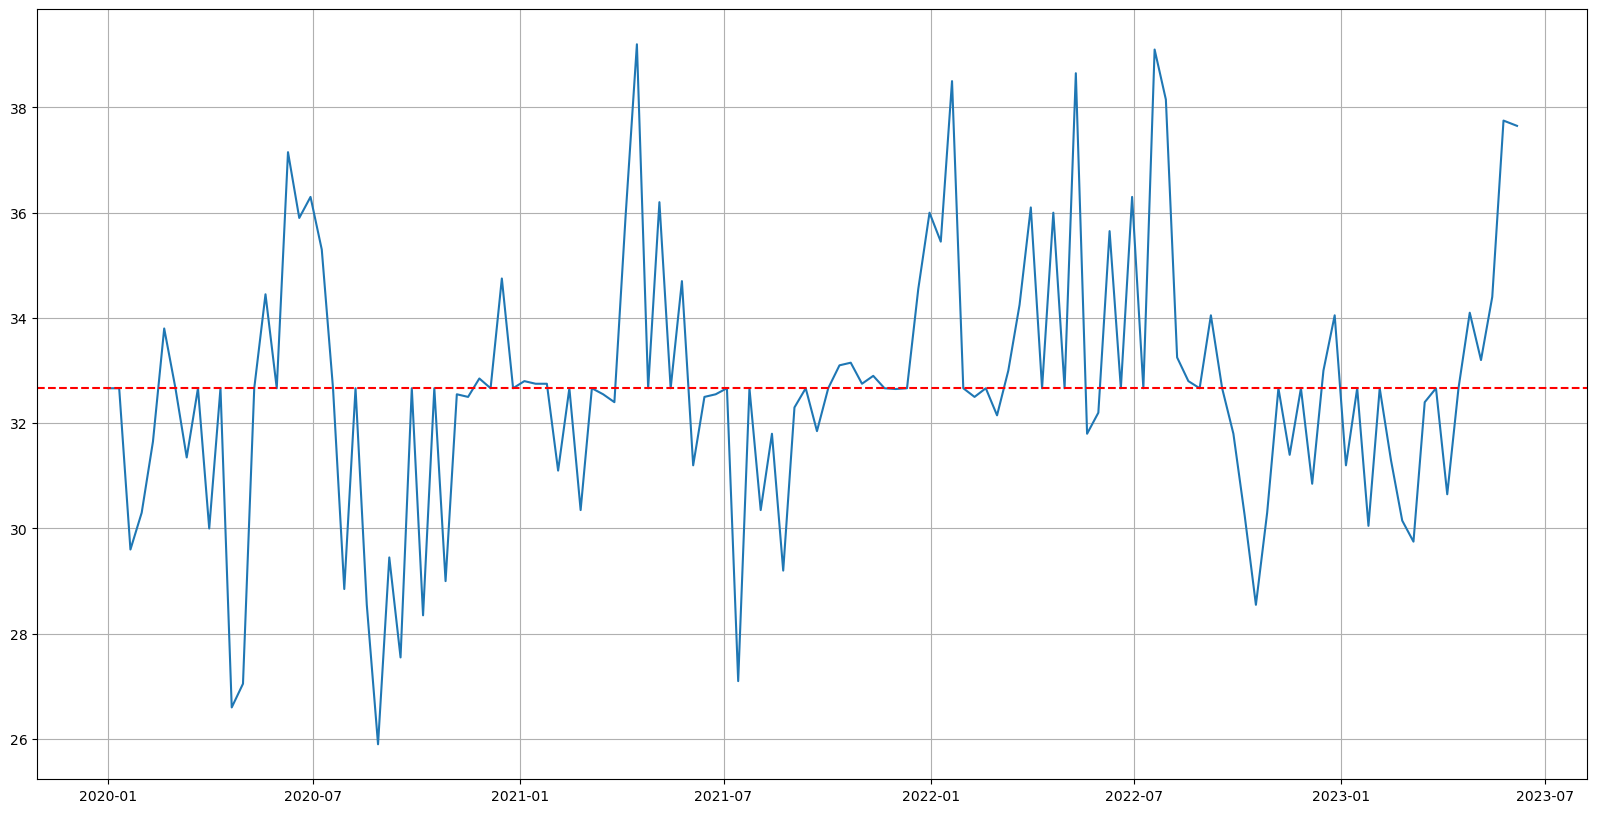

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(sampled_data['index'], sampled_data['Daging Ayam'])
plt.axhline(y=column_mean, color='r', linestyle='--')
ax.grid(True)

In [22]:
sampled_data.isna().sum()

index          0
Daging Ayam    0
dtype: int64